In [1]:
import sys
sys.path.append("./../")

import torch
import numpy as np
import matplotlib.pyplot as plt
from torchvision.utils import make_grid
from torch.utils.data import DataLoader

from datasets.cub import CubDataset
from datasets.common import collate_fn
from config import Config
from modules.dalle_dvae.model import DVAE

In [2]:
def show(img, figsize=(8, 6)):
    plt.figure(figsize=figsize)
    npimg = img.numpy()
    fig = plt.imshow(np.transpose(npimg, (1,2,0)), interpolation='nearest')
    fig.axes.get_xaxis().set_visible(False)
    fig.axes.get_yaxis().set_visible(False)
    plt.show()

In [3]:
CONFIG = Config(local=True)

CONFIG.BATCH_SIZE = 2
CONFIG.img_size = 256

train_dataset = CubDataset(root_img_path=CONFIG.root_img_path,
                           root_text_path=CONFIG.root_text_path,
                           imgs_list_file_path=CONFIG.imgs_list_file_path,
                           img_size=CONFIG.img_size)
train_loader = DataLoader(dataset=train_dataset,
                          batch_size=CONFIG.BATCH_SIZE,
                          shuffle=True,
                          collate_fn=collate_fn)

In [4]:
model = DVAE()
model.load_model(root_path="./../models/DALLE_dvae/", model_name="dvae")
_ = model.eval()

In [7]:
model.encoder.group_count

4

In [5]:
imgs, _ = next(iter(train_loader))
imgs.shape

torch.Size([2, 3, 256, 256])

In [6]:
z_logits = model.encode(imgs)

In [7]:
z_logits.shape

torch.Size([2, 8192, 32, 32])

In [8]:
z = model.quantize(z_logits)

In [9]:
z.shape

torch.Size([2, 8192, 32, 32])

In [10]:
z.unique()

tensor([0., 1.])

In [11]:
x_rec = model.decode(z)

In [12]:
x_rec.shape

torch.Size([2, 3, 256, 256])

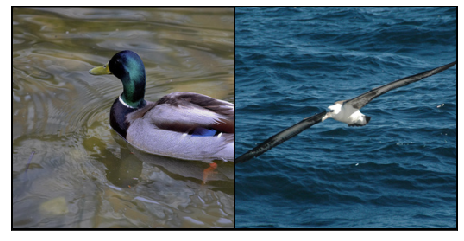

In [13]:
show(make_grid(imgs.data, nrow=2))

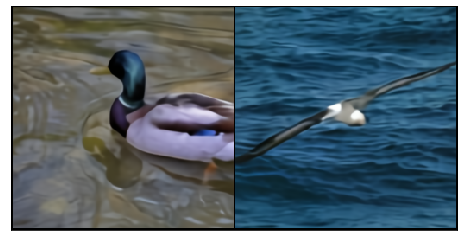

In [14]:
show(make_grid(x_rec.data, nrow=4))

In [37]:
z_new = z.detach().clone()

z_new[:,:,20:25, 20:25] = 0
z_new[:,1900,20:25, 20:25] = 1

In [38]:
x_rec_new = model.decode(z_new)

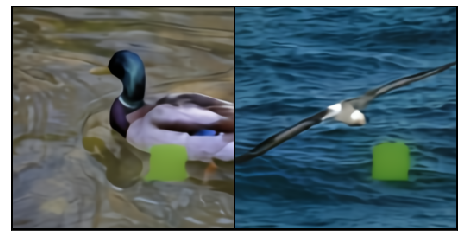

In [39]:
show(make_grid(x_rec_new.data, nrow=4))

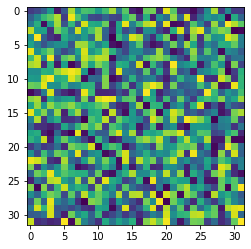

In [27]:
latcode = z.argmax(dim=1)[0]
lat_img = latcode / latcode.max()

plt.imshow(lat_img.numpy())
plt.show()